In [1]:
%matplotlib inline
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
from datetime import datetime, timedelta
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ncss_url = "http://localhost:8080/thredds/ncss/rosetta/ExampleBoreholeDataset.nc"
ncss = NCSS(ncss_url)

In [3]:
start_year = 2008
start = datetime(start_year,1,1)
stop = start + timedelta(days=365)

query = ncss.query()
query.time_range(start, stop)
query.variables('all')
query.accept('netcdf')

var=all&time_start=2008-01-01T00%3A00%3A00&time_end=2008-12-31T00%3A00%3A00&accept=netcdf

In [4]:
data = ncss.get_data(query)
list(data.variables.keys())

[u'latitude',
 u'longitude',
 u'stationAltitude',
 u'station_id',
 u'time',
 u'stationIndex',
 u'soil_temperature',
 u'soil_temperature_2']

In [5]:
soil_temp_sfc = data.variables["soil_temperature"][:]
soil_temp_25cm = data.variables["soil_temperature_2"][:]
station_lat = data.variables["latitude"][:]
station_lon = data.variables["longitude"][:]

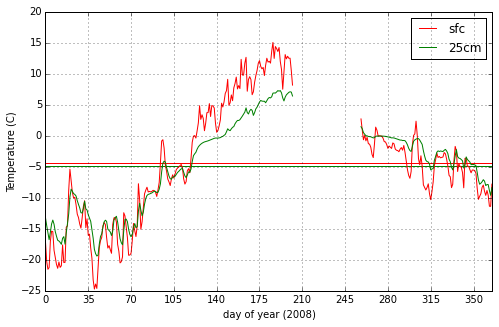

In [6]:
plt.figure(figsize=(8,5))
plt.plot(soil_temp_sfc, 'r')
plt.plot(soil_temp_25cm, 'g')
plt.xlabel("day of year ({})".format(start_year))
plt.ylabel("Temperature (C)")
plt.xlim((0,365))
plt.xticks(np.arange(0,365,35))
plt.grid()
plt.hlines(soil_temp_sfc.mean(),0,365, "r")
plt.hlines(soil_temp_25cm.mean(),0,365, "g")
plt.legend(["sfc", "25cm"])

In [7]:
# google thredds reanalysis
# http://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis.dailyavgs/surface/catalog.html
reanalysis_dap = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/air.sig995.{}.nc".format(start_year)

In [8]:
reana = Dataset(reanalysis_dap)

In [9]:
longitude = reana.variables["lon"][:]
latitude = reana.variables["lat"][:]

In [10]:
longitude_idx = (np.abs(longitude - station_lon)).argmin()
latitude_idx = (np.abs(latitude - station_lat)).argmin()

In [11]:
reana_temperature = reana.variables["air"][:,latitude_idx, longitude_idx]

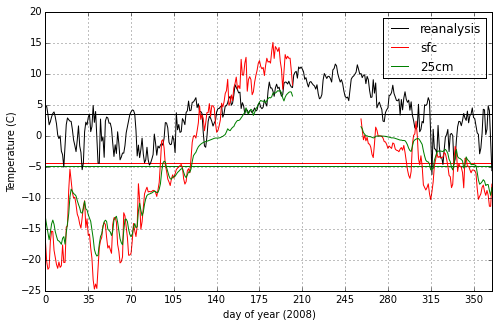

In [12]:
plt.figure(figsize=(8,5))
plt.plot(reana_temperature - 273.15, 'k')
plt.plot(soil_temp_sfc, 'r')
plt.plot(soil_temp_25cm, 'g')
plt.xlabel("day of year ({})".format(start_year))
plt.ylabel("Temperature (C)")
plt.xlim((0,365))
plt.xticks(np.arange(0,365,35))
plt.grid()
plt.hlines((reana_temperature - 273.15).mean(),0,365, "k")
plt.hlines(soil_temp_sfc.mean(),0,365, "r")
plt.hlines(soil_temp_25cm.mean(),0,365, "g")
plt.legend(["reanalysis", "sfc", "25cm"])